# <span style="color:red"> Lezione 11 </span>

## <span style="color:green"> Esercizio 11.1 </span>

In [11]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# set the function
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
el_sigma = [0.0,0.3]
el_train = [100,1000]
el_valid = [10,100]

Faccio un ciclo studiando i casi:
    - 100 el in x_train e  10 el in x_valid con e senza errore
    - 500 el in x_train e  50 el in x_valid con e senza errore

Case with el_train=100, el_valid=10 and sigma=0.0
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30
1/1 [==============================] - 0s 1ms/step - loss: 0.1593 - mse: 0.1593

Test loss: 0.15929213166236877
Test accuracy: 0.15929213166236877
Case with el_train=100, el_valid=10 and sigma=0.3
Model: "sequential_5"
__________________________________

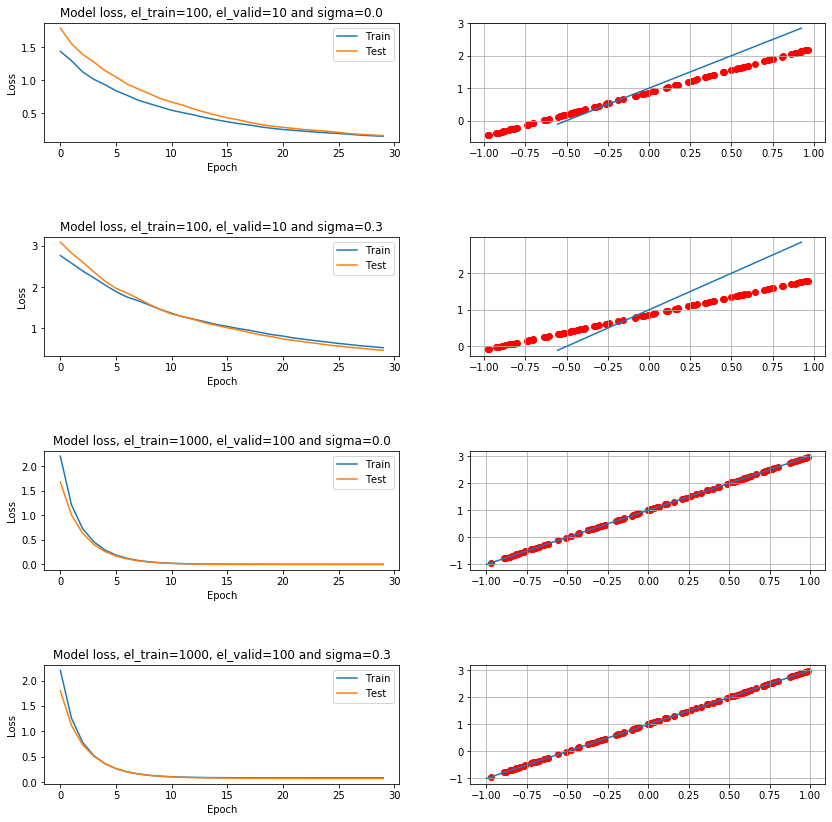

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(14,14),gridspec_kw=dict(wspace=0.2, hspace=0.8))
k=0
for i in range(2):
    for j in range(2):
        # generate training inputs
        np.random.seed(0)
        x_train = np.random.uniform(-1, 1, el_train[i])
        x_valid = np.random.uniform(-1, 1, el_valid[i])
        x_valid.sort()
        y_target = m * x_valid + b # ideal (target) linear function

        sigma = el_sigma[j] # noise standard deviation, for the moment it is absent
        y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma)
        model = tf.keras.Sequential()
        model.add(Dense(1, input_shape=(1,)))# primo layer quindi devo specificare l'input del layer

        # compile the model choosing optimizer, loss and metrics objects
        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        # get a summary of our composed model
        print(f'Case with el_train={el_train[i]}, el_valid={el_valid[i]} and sigma={sigma}')
        model.summary()
        # fit the model using training dataset
        # over 10 epochs of 32 batch size each
        # report training progress against validation data
        history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=30,
                  shuffle=True, # a good idea is to shuffle input before at each epoch
                  validation_data=(x_valid, y_valid),
                  verbose=30)
        # evaluate model
        score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

        # print performance
        print()
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        # look into training history
        # Plot training & validation loss values
        h=0
        ax[k,h].plot(history.history['loss'])
        ax[k,h].plot(history.history['val_loss'])
        ax[k,h].set_title(f'Model loss, el_train={el_train[i]}, el_valid={el_valid[i]} and sigma={sigma}')
        ax[k,h].set_ylabel('Loss')
        ax[k,h].set_xlabel('Epoch')
        ax[k,h].legend(['Train', 'Test'], loc='best')
        h+=1
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        ax[k,h].scatter(x_predicted, y_predicted,color='r')
        ax[k,h].plot(x_valid, y_target)
        ax[k,h].grid(True)
        k+=1

## <span style="color:green"> Esercizio 11.2 </span>

In [13]:
import pandas as pd

In [14]:
# target parameters of f(x) = a + bx + cx2 +dx3
a = 4 
b = -3 
c = -2
d = 3
sigma = 0.2 # noise standard deviation, for the moment it is absent
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + (b*x_valid) + (c*x_valid**2) + (d*x_valid**3) # ideal (target) linear function
Y_TRAIN = np.random.normal(a + (b*x_train) + (c*x_train**2) + (d*x_train**3), sigma)
Y_VALID = np.random.normal(a + (b*x_valid) + (c*x_valid**2) + (d*x_valid**3), sigma)
#train
cost_train = np.array(a)
y_train = b*x_train
y2_train = c*x_train**2
y3_train = d*x_train**3
# valid
cost_valid = np.array(a)
y_valid = b*x_valid
y2_valid = c*x_valid**2
y3_valid = d*x_valid**3
#dataframes
dt = {'X': x_train, 'a': cost_train, 'bX': y_train, 'cX2': y2_train, 'dX3': y3_train}
df_train = pd.DataFrame(data=dt)
#df_train.head(10)
dv = {'X': x_valid, 'a': cost_valid, 'bX': y_valid, 'cX2': y2_valid, 'dX3': y3_valid}
df_valid = pd.DataFrame(data=dv)
df_valid.head(10)

,X,a,bX,cX2,dX3
0,-0.998672,4,2.996015,-1.994690,-2.988060
1,-0.989380,4,2.968140,-1.957745,-2.905431
2,-0.979873,4,2.939618,-1.920301,-2.822475
3,-0.977290,4,2.931869,-1.910190,-2.800214
4,-0.972983,4,2.918948,-1.893390,-2.763354
5,-0.965879,4,2.897637,-1.865845,-2.703270
6,-0.958100,4,2.874300,-1.835911,-2.638479
7,-0.951455,4,2.854364,-1.810532,-2.583958
8,-0.938678,4,2.816034,-1.762232,-2.481253
9,-0.914188,4,2.742563,-1.671478,-2.292067


### <span style="color:blue">A single layer with 4 neurons</span>

In [16]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=[4],activation='elu'))# primo layer quindi devo specificare l'input del layer
# anti-overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# creating the model
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="mean_squared_error")
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=df_train[['a','bX','cX2','dX3']], y=Y_TRAIN, 
          epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(df_valid[['a','bX','cX2','dX3']],Y_VALID),
          verbose=True,
          callbacks=callback
                   )
# return weights
model.get_weights()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 0s 14ms/step - loss: 18.4145 - val_loss: 16.6100
Epoch 2/200
32/32 [==============================] - 0s 9ms/step - loss: 17.9389 - val_loss: 16.0458
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 17.3730 - val_loss: 15.4394
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 16.7614 - val_loss: 14.8237
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 16.1137 - val_loss: 14.2329
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 15.4578 - val_loss: 13.6338
Epoch 7/200
32/32 [============================

32/32 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0329
Epoch 159/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0329
Epoch 160/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0328
Epoch 161/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0329
Epoch 162/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0329
Epoch 163/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0329
Epoch 164/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0331
Epoch 165/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0328
Epoch 166/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0329
Epoch 167/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0328
Epoc

[array([[0.65612525],
        [1.0064691 ],
        [1.0109636 ],
        [1.0119549 ]], dtype=float32),
 array([1.3850387], dtype=float32)]

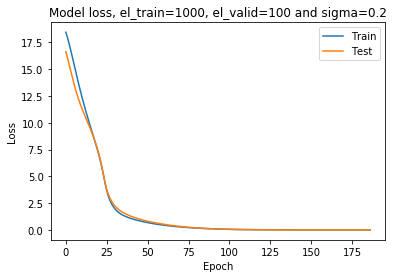

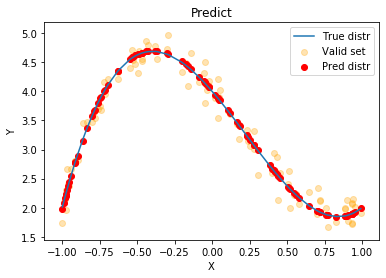

In [17]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss, el_train=1000, el_valid=100 and sigma=0.2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
# predict
plt.plot(x_valid, y_target, label='True distr')
plt.scatter(x_valid,Y_VALID,color='orange',alpha=0.3, label='Valid set')
plt.scatter(x_valid, model.predict(df_valid[['a','bX','cX2','dX3']]), color="red",label='Pred distr')
plt.title(f'Predict')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='best')
plt.show()

## <span style="color:green"> Esercizio 11.3 </span>

* Dataframe

In [33]:
# target parameters of f(x,y) = sin(x2+y2)
np.random.seed(0)
sigma = 0.2
# 
m_train = np.random.uniform(-1, 1, 1000)
n_train = np.random.uniform(-1, 1, 1000)
m_valid = np.random.uniform(-1, 1, 100)
n_valid = np.random.uniform(-1, 1, 100)
m_valid.sort()
n_valid.sort()
#
z_target = np.sin(m_valid**2+n_valid**2)
z_train = np.random.normal(np.sin(m_train**2+n_train**2),sigma)
z_valid = np.random.normal(np.sin(m_valid**2+n_valid**2),sigma)
#dataframes
dt = {'X': m_train, 'Y': n_train, 'sin(X2)cos(Y2)': np.sin(m_train**2)*np.cos(n_train**2),\
      'cos(X2)sin(Y2)': np.sin(n_train**2)*np.cos(m_train**2)}
df_train = pd.DataFrame(data=dt)
#df_train.head(10)
dv = {'X': m_valid, 'Y': n_valid, 'sin(X2)cos(Y2)': np.sin(m_valid**2)*np.cos(n_valid**2),\
      'cos(X2)sin(Y2)': np.sin(n_valid**2)*np.cos(m_valid**2)}
df_valid = pd.DataFrame(data=dv)
df_valid.head(10)

,X,Y,sin(X2)cos(Y2),cos(X2)sin(Y2)
0,-0.999853,-0.985438,0.474838,0.446224
1,-0.996811,-0.972689,0.490096,0.442607
2,-0.949536,-0.961536,0.472319,0.495249
3,-0.945604,-0.943487,0.490644,0.486643
4,-0.929560,-0.941458,0.480825,0.503084
5,-0.921579,-0.933185,0.483671,0.505197
6,-0.901429,-0.912275,0.488796,0.508465
7,-0.876222,-0.908299,0.471273,0.528485
8,-0.873262,-0.839066,0.526550,0.468028
9,-0.833670,-0.795961,0.516109,0.454695


In [41]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=[2],activation='elu'))# primo layer quindi devo specificare l'input del layer
# anti-overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# creating the model
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="mean_squared_error")
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=df_train[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']], y=z_train, 
          epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(df_valid[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']],z_valid),
          verbose=True,
          callbacks=callback
                   )
# return weights
model.get_weights()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 1s 17ms/step - loss: 1.3119 - val_loss: 1.0450
Epoch 2/200
32/32 [==============================] - 0s 10ms/step - loss: 1.2612 - val_loss: 1.0051
Epoch 3/200
32/32 [==============================] - 0s 9ms/step - loss: 1.2086 - val_loss: 0.9645
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 1.1545 - val_loss: 0.9227
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 1.0990 - val_loss: 0.8799
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 1.0414 - val_loss: 0.8371
Epoch 7/200
32/32 [==============================] - 0s 7

32/32 [==============================] - 0s 6ms/step - loss: 0.0384 - val_loss: 0.0361
Epoch 160/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0361
Epoch 161/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0360
Epoch 162/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0382 - val_loss: 0.0358
Epoch 163/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0357
Epoch 164/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0357
Epoch 165/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0356
Epoch 166/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0355
Epoch 167/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.0355
Epoch 168/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.0354
Epoc

[array([[1.0022155 ],
        [0.97368854]], dtype=float32),
 array([0.00213731], dtype=float32)]

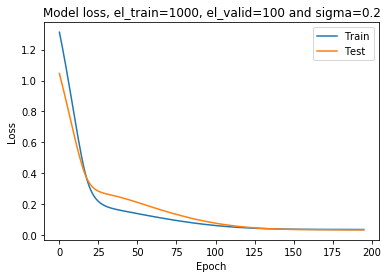

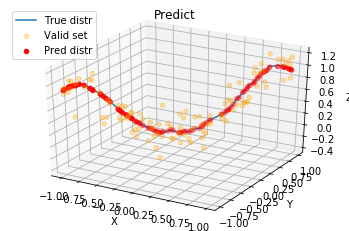

In [42]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss, el_train=1000, el_valid=100 and sigma=0.2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
# predict
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_valid['X'],df_valid['Y'], z_target, label='True distr')
ax.scatter(df_valid['X'],df_valid['Y'],z_valid,color='orange',alpha=0.3, label='Valid set')
ax.scatter(df_valid['X'],df_valid['Y'], model.predict(df_valid[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']]), color="red",label='Pred distr')
ax.set_title(f'Predict')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.legend(loc='best')
plt.show()